In [1]:
from os import listdir
from os.path import isfile, join

import numpy as np
import matplotlib.pyplot as plt
import madmom

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

# Calculate Spectrogram For Given Audio

TODO: 
- add STFT options to the spectrogram (window size etc)
- add possibility to use different options at the same time (add depth dimension, is there a problem with the resulting shape?)

In [35]:
audio_dir = '../data/music_speech/music_wav/'
audio_files = [f for f in listdir(audio_dir) if isfile(join(audio_dir, f))]

# TODO: see above, could be handled here
spectro_function = lambda path: madmom.audio.spectrogram.Spectrogram(path).log()

# calc spectrogram for all files in the folder
spectrograms = np.array([spectro_function(join(audio_dir, af)) for af in audio_files])

# transorm to N, H, W shape
spectrograms = spectrograms.transpose(0, 2, 1) 

In [38]:
N, H, W = spectrograms.shape

N_h = int(np.floor(N**.5))
N_w = N // N_h

hpad, wpad = 1, 1
pad_val = np.min(spectrograms)

# add padding and grid presentation
padded_spectros = np.pad(spectrograms[:N_h * N_w], [[0,0], [hpad,hpad], [wpad,wpad]], mode='constant', constant_values=pad_val)
H_padded = H + 2*wpad
W_padded = W + 2*hpad
spectro_grid = padded_spectros.reshape(N_h, N_w, H_padded, W_padded).transpose(0, 2, 1, 3).reshape(N_h* H_padded, N_w * W_padded)

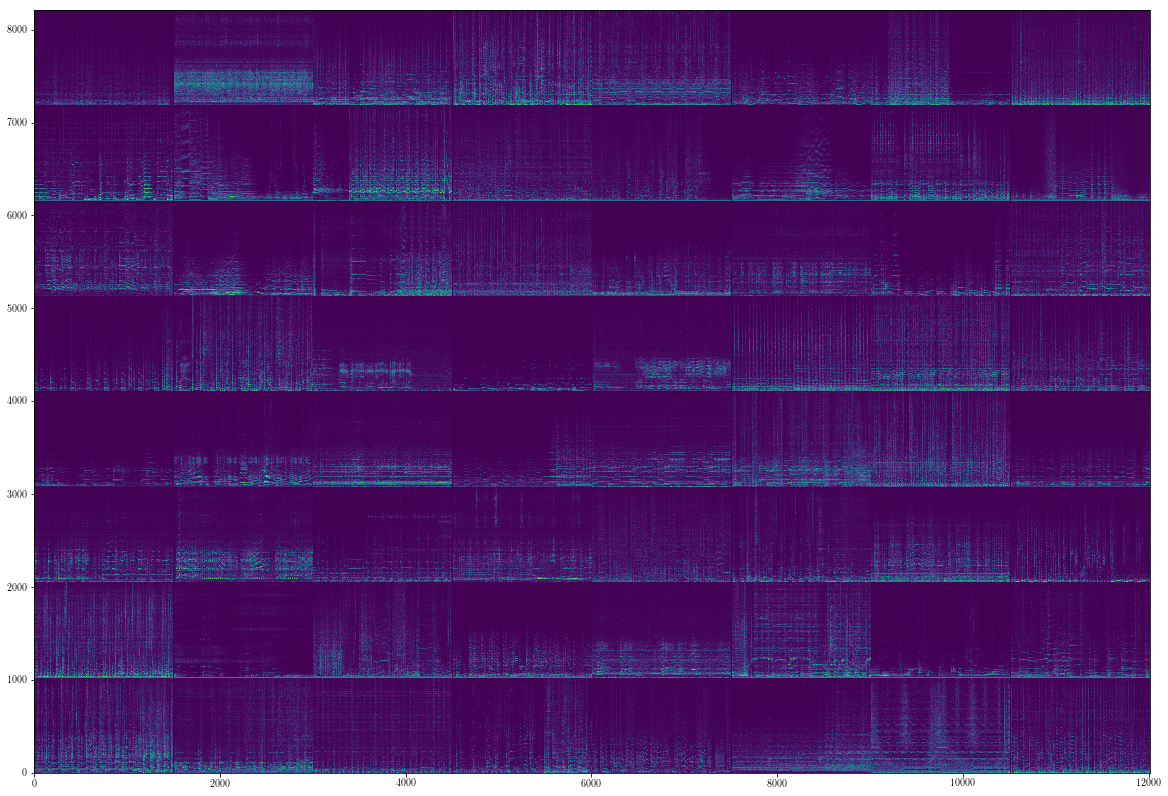

In [39]:
# present the grid
fig = plt.figure(figsize=(20, 20))
plt.imshow(spectro_grid, origin='lower')
plt.show()